In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import monte_carlo_experiment

Исследование $T^{knn}$ в зависимости от параметра распределения

In [2]:
#Фиксируем параметры процедуры построения графа
K = 4          # число соседей для knn
n_sampels = 100     # число итераций
N = 200             # размер набора генерируемых данных
GRAPH_TYPE = 'knn'  # тип графа 



Исследуем зависимость числа компонент связности в зависимости от lambda при распределении h0

In [ ]:
lambdas = np.arange(0.2, 20.2, 0.2) #сгенерировали набор лямбд 
results_with_variable_lambda_h0 = {}


for l in tqdm(lambdas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l,
            'distribution': 'h0'
         }

    results_with_variable_lambda_h0[l] = monte_carlo_experiment(params, n_sampels)

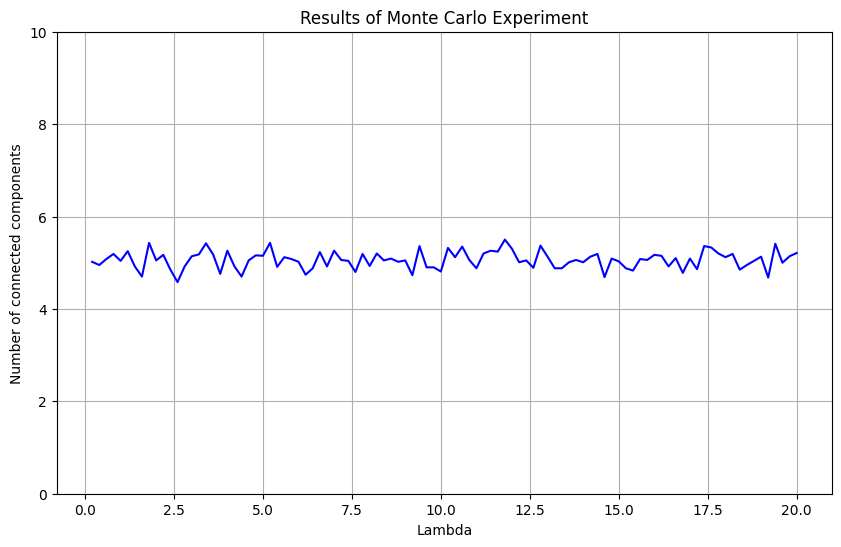

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_lambda_h0.keys(), results_with_variable_lambda_h0.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Number of connected components')
plt.ylim(0, 10)
plt.grid()
plt.show()

Как мы видим, число компонент связности почти не зависит от параметра lambda.

Теперь повторим тот же эксперимент но для распределения H1

In [ ]:
results_with_variable_lambda_h1 = {}


for l in tqdm(lambdas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l,
            'distribution': 'h1'
         }

    results_with_variable_lambda_h1[l] = monte_carlo_experiment(params, n_sampels)

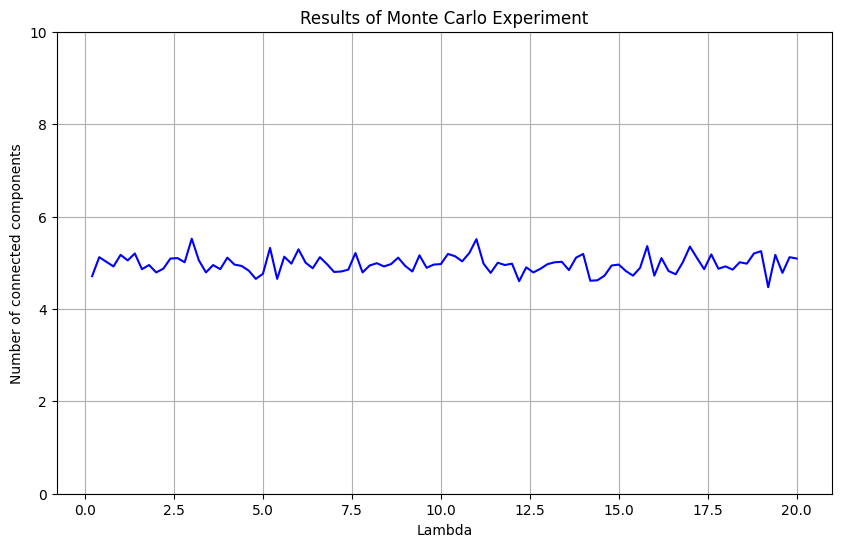

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_lambda_h1.keys(), results_with_variable_lambda_h1.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Number of connected components')
plt.ylim(0, 10)
plt.grid()
plt.show()

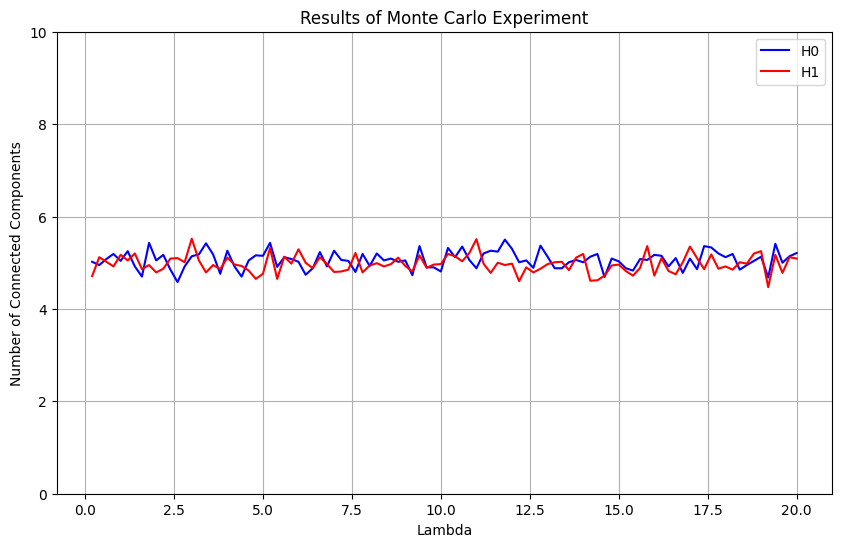

In [12]:
plt.figure(figsize=(10, 6))

# График для h0
plt.plot(results_with_variable_lambda_h0.keys(), results_with_variable_lambda_h0.values(), linestyle='-', color='b', label='H0')

# График для h1
plt.plot(results_with_variable_lambda_h1.keys(), results_with_variable_lambda_h1.values(), linestyle='-', color='r', label='H1')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Number of Connected Components')
plt.ylim(0, 10)
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

Как мы видим, зависимости тоже нет. 
Теперь посмотрим, как зависит число компонент связности при изменении числа соседей для H0

In [ ]:
number_neighbors = np.arange(1, 15, 1) #сгенерировали набор лямбд 
results_with_variable_k_h0 = {}


for k in tqdm(number_neighbors, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': k,
            'lambda': 1,
            'distribution': 'h0'
         }

    results_with_variable_k_h0[k] = monte_carlo_experiment(params, n_sampels)

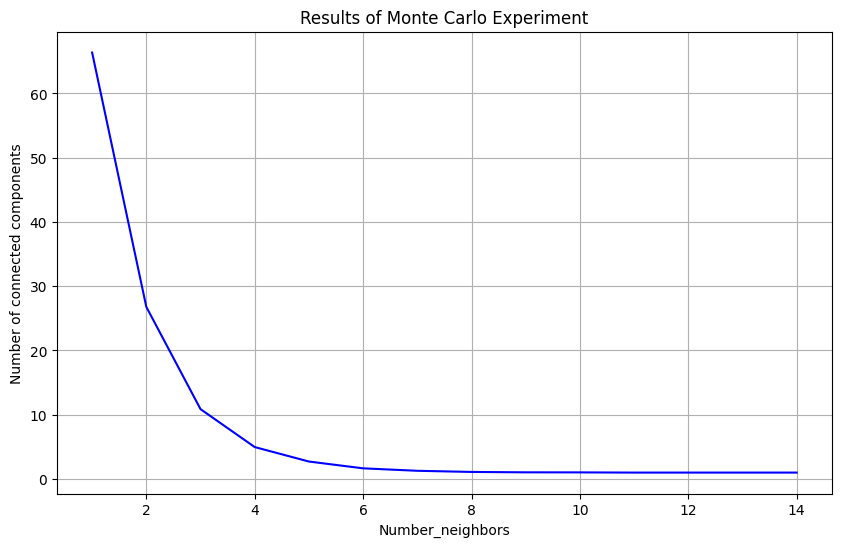

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_k_h0.keys(), results_with_variable_k_h0.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Number_neighbors')
plt.ylabel('Number of connected components')
plt.grid()
plt.show()

Как мы видим, при увеличении k число компонент связности уменьшается до 1

Проведем тот же эксперимент для H1

In [ ]:
number_neighbors = np.arange(1, 15, 1)
results_with_variable_k_h1 = {}


for k in tqdm(number_neighbors, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': k,
            'lambda': 1/np.sqrt(10),
            'distribution': 'h1'
         }

    results_with_variable_k_h1[k] = monte_carlo_experiment(params, n_sampels)

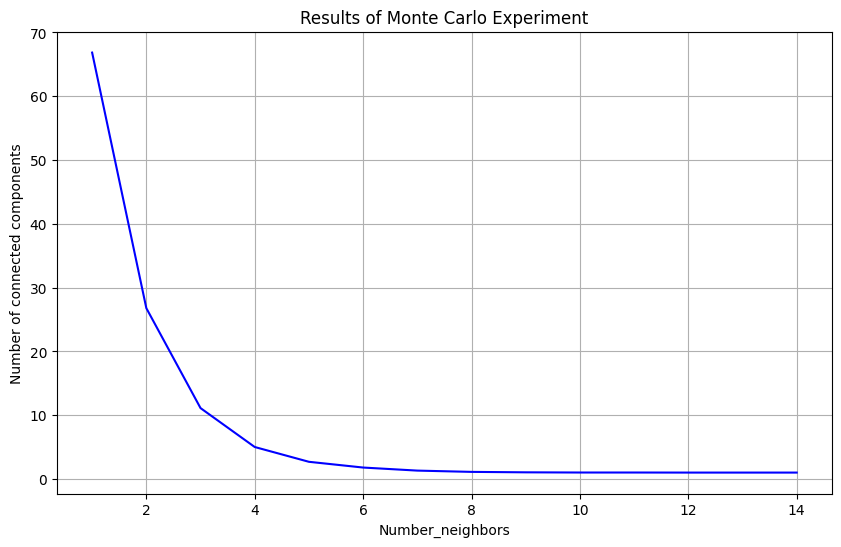

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_k_h1.keys(), results_with_variable_k_h1.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Number_neighbors')
plt.ylabel('Number of connected components')
plt.grid()
plt.show()

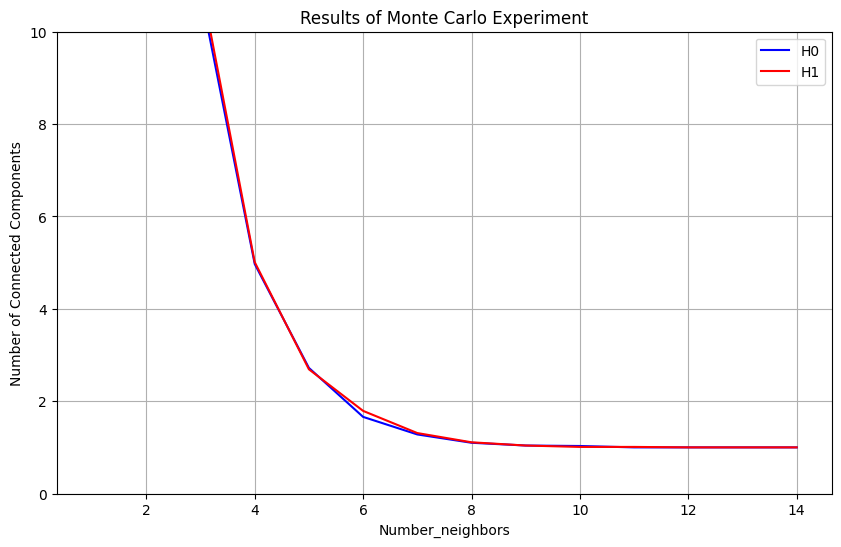

In [23]:
plt.figure(figsize=(10, 6))

# График для h0
plt.plot(results_with_variable_k_h0.keys(), results_with_variable_k_h0.values(), linestyle='-', color='b', label='H0')

# График для h1
plt.plot(results_with_variable_k_h1.keys(), results_with_variable_k_h1.values(), linestyle='-', color='r', label='H1')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Number_neighbors')
plt.ylabel('Number of Connected Components')
plt.ylim(0, 10)
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

Результаты для H0 и H1 почти идентичны.

Теперь проверим, как число компонент зависит от размера набора данных для h0

In [17]:
data_size = np.arange(10, 1000, 10)
results_with_variable_n_h0 = {}


for n in tqdm(data_size, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': n,
            'x': K,
            'lambda': 1,
            'distribution': 'h0'
         }

    results_with_variable_n_h0[n] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 99/99 [00:55<00:00,  1.78it/s]


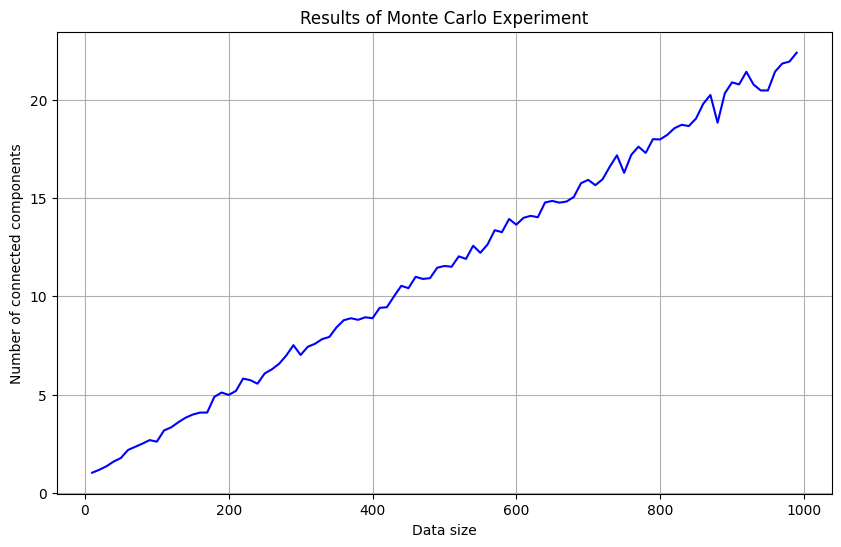

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_n_h0.keys(), results_with_variable_n_h0.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Number of connected components')
plt.grid()
plt.show()

Как мы видим, число компонент связности возрастает с увеличением размера выборки.

Теперь посмотрим для H1

In [20]:
data_size = np.arange(10, 1000, 10)
results_with_variable_n_h1 = {}


for n in tqdm(data_size, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': n,
            'x': K,
            'lambda': 1/np.sqrt(10),
            'distribution': 'h1'
         }

    results_with_variable_n_h1[n] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 99/99 [00:58<00:00,  1.71it/s]


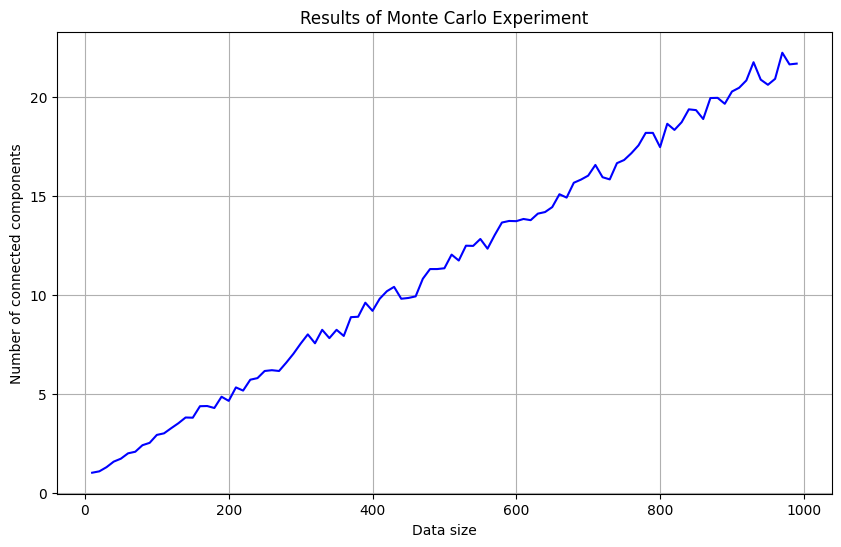

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_n_h1.keys(), results_with_variable_n_h1.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Number of connected components')
plt.grid()
plt.show()

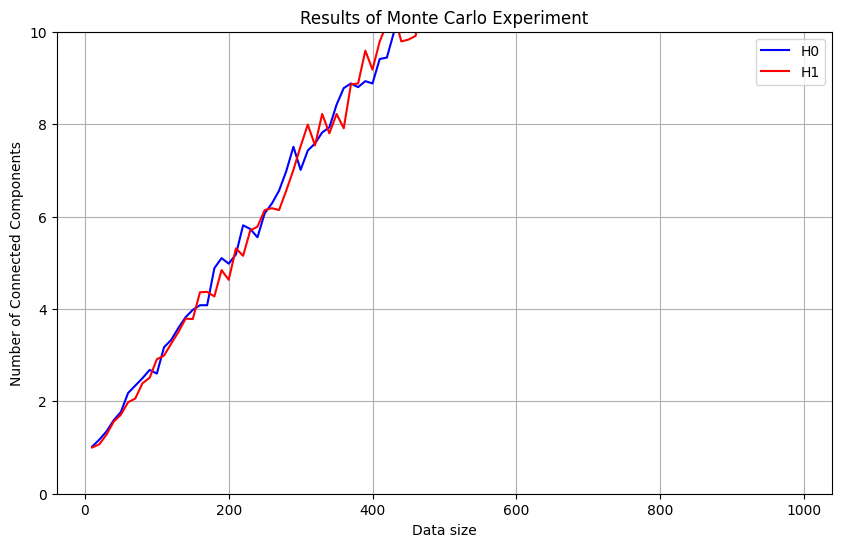

In [24]:
plt.figure(figsize=(10, 6))

# График для h0
plt.plot(results_with_variable_n_h0.keys(), results_with_variable_n_h0.values(), linestyle='-', color='b', label='H0')

# График для h1
plt.plot(results_with_variable_n_h1.keys(), results_with_variable_n_h1.values(), linestyle='-', color='r', label='H1')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Number of Connected Components')
plt.ylim(0, 10)
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

Результат почти такой же, как и у H0.